In [1]:
from utils.dataframe import read_final_csv

df = read_final_csv("boosting_model")

In [2]:
from utils.dataframe import delete_columns

last_n_matches = [5, 10, 20, 50]
df = delete_columns(df, last_n_matches)

In [3]:
correlations = df.corr(numeric_only=True)['player_1_won'].drop('player_1_won')
sorted_corrs = correlations.abs().sort_values(ascending=False)

# To see actual signed correlation (not just abs value)
strongest_corrs = correlations.loc[sorted_corrs.index]
print(strongest_corrs)

elo_diff                  0.374787
elo_surface_diff          0.357317
last_20_win_ratio_diff    0.325704
last_20_match_won_diff    0.325704
last_10_win_ratio_diff    0.318537
                            ...   
surface_Clay             -0.000844
player_1_entry_Alt       -0.000842
tourney_month             0.000507
tourney_level_D           0.000154
player_2_entry_SE        -0.000016
Name: player_1_won, Length: 136, dtype: float64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95375 entries, 0 to 95374
Columns: 137 entries, player_1_entry_ALT to player_1_won
dtypes: bool(28), float64(98), int64(11)
memory usage: 81.9 MB


In [5]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [6]:
split_year = 2022

x_train = df[df["tourney_year"] < split_year].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < split_year]["player_1_won"]

x_val = df[df["tourney_year"] == split_year].drop("player_1_won", axis=1)
y_val = df[df["tourney_year"] == split_year]["player_1_won"]

x_test = df[df["tourney_year"] > split_year].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] > split_year]["player_1_won"]

In [7]:
x_train.tail()

,player_1_entry_ALT,player_1_entry_Alt,player_1_entry_LL,player_1_entry_PR,player_1_entry_Q,player_1_entry_SE,player_1_entry_WC,player_1_hand_L,player_1_hand_R,player_2_entry_ALT,...,last_5_win_ratio_diff,last_10_win_ratio_diff,last_20_win_ratio_diff,last_50_win_ratio_diff,elo_diff,last_5_elo_progress_diff,last_10_elo_progress_diff,last_20_elo_progress_diff,last_50_elo_progress_diff,draw_size
86891,False,False,False,False,False,False,False,False,True,False,...,-0.4,-0.2,-0.10,-0.04,-410.048681,-0.004253,0.015425,0.001138,0.032805,2.0
86892,False,False,False,False,False,False,False,False,True,False,...,0.2,0.6,0.80,0.92,193.823219,-0.028676,-0.042889,-0.080891,-0.152293,2.0
86893,False,False,False,False,False,False,False,False,True,False,...,0.6,0.8,0.65,0.86,392.190788,0.008309,-0.006669,0.049812,0.048016,2.0
86894,False,False,False,False,False,False,False,False,True,False,...,0.0,-0.5,-0.75,-0.90,-293.499053,0.019730,0.031225,0.065317,0.086457,2.0
86895,False,False,False,False,False,False,False,False,True,False,...,-0.6,-0.3,-0.15,-0.06,-294.723655,-0.017238,0.000855,-0.016165,0.020251,2.0


In [8]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42,
                      max_depth=6,
                      learning_rate=0.08,
                      early_stopping_rounds=100)

model.fit(x_train, y_train,
          eval_set=[(x_val, y_val)],
          verbose=True)

[0]	validation_0-logloss:0.68112
[1]	validation_0-logloss:0.67049
[2]	validation_0-logloss:0.66176
[3]	validation_0-logloss:0.65382
[4]	validation_0-logloss:0.64680
[5]	validation_0-logloss:0.64087
[6]	validation_0-logloss:0.63619
[7]	validation_0-logloss:0.63159
[8]	validation_0-logloss:0.62769
[9]	validation_0-logloss:0.62443
[10]	validation_0-logloss:0.62145
[11]	validation_0-logloss:0.61909
[12]	validation_0-logloss:0.61667
[13]	validation_0-logloss:0.61426
[14]	validation_0-logloss:0.61247
[15]	validation_0-logloss:0.61064
[16]	validation_0-logloss:0.60950
[17]	validation_0-logloss:0.60795
[18]	validation_0-logloss:0.60692
[19]	validation_0-logloss:0.60572
[20]	validation_0-logloss:0.60483
[21]	validation_0-logloss:0.60371
[22]	validation_0-logloss:0.60289
[23]	validation_0-logloss:0.60219
[24]	validation_0-logloss:0.60168
[25]	validation_0-logloss:0.60103
[26]	validation_0-logloss:0.60035
[27]	validation_0-logloss:0.59984
[28]	validation_0-logloss:0.59940
[29]	validation_0-loglos

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,None


In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

xgboost_pred = model.predict(x_test)
xgboost_proba = model.predict_proba(x_test)[:, 1]

xgboost_acc = accuracy_score(y_test, xgboost_pred)
xgboost_auc = roc_auc_score(y_test, xgboost_proba)
xgboost_logloss = log_loss(y_test, xgboost_proba)

print("XGBoost Model Performance:")
print(f"XGBoost Accuracy: {xgboost_acc * 100:.2f}%")
print(f"ROC AUC: {xgboost_auc:.2f}")
print(f"Log Loss: {xgboost_logloss:.2f}")

XGBoost Model Performance:
XGBoost Accuracy: 66.70%
ROC AUC: 0.73
Log Loss: 0.61


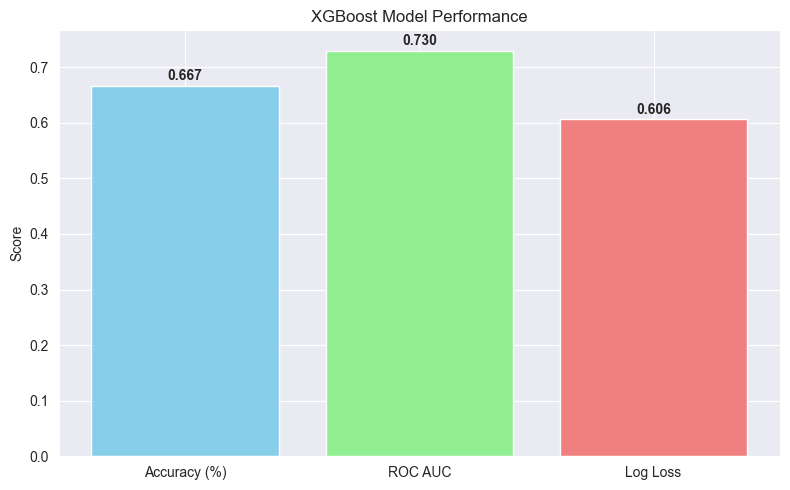

In [23]:
import matplotlib.pyplot as plt

metrics = ['Accuracy (%)', 'ROC AUC', 'Log Loss']
values = [xgboost_acc, xgboost_auc, xgboost_logloss]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('XGBoost Model Performance')
plt.ylabel('Score')

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

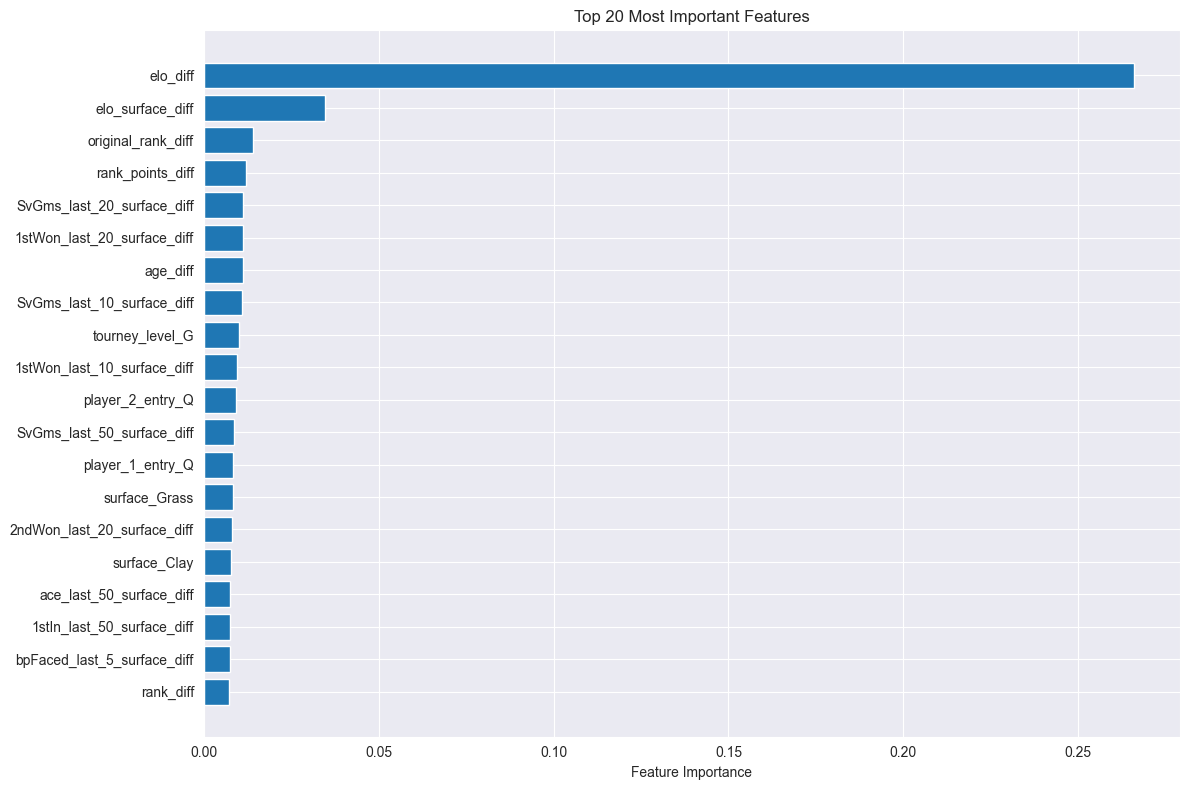

In [24]:
import pandas as pd

feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_20 = feature_importance.head(20)
plt.barh(range(len(top_20)), top_20['importance'])
plt.yticks(range(len(top_20)), top_20['feature'])

plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [25]:
final_split_year = 2024

x_final_train = df[df["tourney_year"] < final_split_year].drop("player_1_won", axis=1)
y_final_train = df[df["tourney_year"] < final_split_year]["player_1_won"]

x_final_val = df[df["tourney_year"] == final_split_year].drop("player_1_won", axis=1)
y_final_val = df[df["tourney_year"] == final_split_year]["player_1_won"]

In [26]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42,
                      max_depth=6,
                      learning_rate=0.08,
                      early_stopping_rounds=100)

model.fit(x_final_train, y_final_train,
          eval_set=[(x_final_val, y_final_val)],
          verbose=True)

[0]	validation_0-logloss:0.68139
[1]	validation_0-logloss:0.67106
[2]	validation_0-logloss:0.66258
[3]	validation_0-logloss:0.65517
[4]	validation_0-logloss:0.64866
[5]	validation_0-logloss:0.64313
[6]	validation_0-logloss:0.63837
[7]	validation_0-logloss:0.63441
[8]	validation_0-logloss:0.63082
[9]	validation_0-logloss:0.62783
[10]	validation_0-logloss:0.62501
[11]	validation_0-logloss:0.62261
[12]	validation_0-logloss:0.62056
[13]	validation_0-logloss:0.61858
[14]	validation_0-logloss:0.61702
[15]	validation_0-logloss:0.61545
[16]	validation_0-logloss:0.61394
[17]	validation_0-logloss:0.61283
[18]	validation_0-logloss:0.61165
[19]	validation_0-logloss:0.61080
[20]	validation_0-logloss:0.60976
[21]	validation_0-logloss:0.60887
[22]	validation_0-logloss:0.60804
[23]	validation_0-logloss:0.60728
[24]	validation_0-logloss:0.60693
[25]	validation_0-logloss:0.60654
[26]	validation_0-logloss:0.60612
[27]	validation_0-logloss:0.60572
[28]	validation_0-logloss:0.60527
[29]	validation_0-loglos

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,None


In [27]:
from config import ROOT_DIR

model.save_model(f"{ROOT_DIR}/models/xgboost.json")